# Final Project Submission


* Student name: Sarabi Eventide 
* Student pace: self-paced
* Scheduled project review date/time: December 21st at 7:30 PM EST 
* Instructor name:  Eli Thomas
* Blog post URL: 


## Contents
* Obtaining the Data  (make hyperlinks)
     - Descriptive Statistics (5-point summary)
* Scrubbing the variables
     - Encoding Variables

## Obtaining the Data

Before making any decisions about the data, we must define the scope of this data analysis. In order to do so, I shall consider the following questions:
1. Who are the stakeholders in this problem?
    - The stakeholders are Kings County real estate developers. Although they may not have in-depth knowledge of statistical analysis, they are familiar with market behvaior and trends.
2. What do they want to know?
    - They want to be able to predict a the price of a house. In order to do this, we need to know how location, size, age and other factors affect the price and create models for these variables. 
3. What data is available to me?
    - I have a set of data containing information about the size, rooms, location, age, renovation and quality of the houses.
4. What tools will aid in completing the project?
    - In addition to using standard packages such as pandas, numpy, seaborn, matplotlib, scipi and sklearn, we will most likely create our projects using simple linear regression or multiple linear regression. 

In [1]:
import pandas as pd # helps manipulate CSV files
import numpy as np  # helps with number crunching
import seaborn as sns # provides extra styling and functionality when visualizing
import matplotlib.pyplot as plt  # helps with visualizing
%matplotlib inline

import statsmodels.api as sm  # used to build statistical models
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols #such as linear regresionimport statsmodels.api as 

import scipy.stats as stats 
from scipy.stats import kurtosis, skew # used for exploring distributions

from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import LabelEncoder  # encodes categorical variables and retains numerical analysis

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('kc_house_data.csv')  # import the file
df.head()  # taking a look at the first few rows
             # to see what type of information I'm working with 

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


<br>
Looking at the excerpt, I see a few different ways we can sort and group the data by date, bedrooms, bathrooms, floors, grade, zipcode and proximity to the waterfront. All of these factors have the ability to affect the price of the house. I also see that `sqft_basement` and **yr_renovated** contain a lot of zeros. Before I begin re-arranging the table, however, I'd like to look at other descriptive measures to see which groups may be more relevant than others. The new information will also help me clean the data.
<br>

In [3]:
df.info() # a quick summary of what the rows and columns contain 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


Right off the bat, we see the waterfront and yr_renovated columns are missing data, but not enough to be dropped right away. 

In [4]:
waterfront_percent = round(((2376/21597)*100),2) 
reno_percent = round(((3842/21597)*100),2)
print(f"We are missing {waterfront_percent} percent of the waterfront data and {reno_percent} percent of the household renovation data")

We are missing 11.0 percent of the waterfront data and 17.79 percent of the household renovation data


In other words, we still have about 90% of the waterfront data and about 80% of the household renovation data. These are sufficient numbers to proceed, however, we must also check the data for placeholder values.

I also see a few columns (waterfront, condition, grade, yr_built, yr_renovated, zipcode) appear to be miscategorized. First, we need to look at the summary statistics to get a better feel for the data. The we need to find out whether there are any anomalies that cause the "sqft_basement" column to be labeled as objects and the "yr_renovated" column to be cast as a float, instead of what I suspect should be at least integers. 

In [5]:
df.describe() # gather summary statistics of the data

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


As I suspected, the waterfront, condition, grade and zipcode values are all categorical. We know this because their distributions are limited and the values are finite. The values in these columns describe quality, rather than quantity. The waterfront column, specifically, is full of boolean values (facing or not facing the waterfront). It is unclear at this moment whether the views column is a boolean (categorical variable) or a view count (quantitative variable). Yr_built, in this case, is a category, but in order to make sorting easier, I will change it to a datetime object. I need to look further into the yr_renovated category, because most of the data is '0', but the max is '2015'. Because sqft_basement is an object, it is not included in the summary statistics. I will need to change the data type in order to explore it. I'll look into each of these specific categories to make decisions. 

## Scrubbing the data


In [6]:
# Automate comparative scatterplot viewing
# this function allows me to plot 4 scatterplots next to each other
# for ease of comparison
def multi_scatter(column_names = None, target = None):
    fig, axs = plt.subplots(1, 4, sharey=True, figsize=(18, 6))
    for idx, feature in enumerate(column_names):
        df.plot(kind='scatter', x=feature, y=target, ax=axs[idx], label=feature, alpha = 0.3)
    plt.legend()

In [7]:
def multi_dist(column_names = None):
    for name in column_names:
        sns.distplot([name])

In [8]:
# Drop outliers in a column
def drop_max(column_name = None):
    max_val = df[column_name].idxmax()
    df[column_name] = df[column_name].drop([max_val])
    return df.boxplot([column_name])

### Are there null values in the data frame?

In [9]:
df['condition'].value_counts()  # checking for placeholders
                                # chose value counts for the sake of granularity
                                # lower frequencies get lost in a hist with so many data points

3    14020
4     5677
5     1701
2      170
1       29
Name: condition, dtype: int64

In [10]:
df['grade'].value_counts() 

7     8974
8     6065
9     2615
6     2038
10    1134
11     399
5      242
12      89
4       27
13      13
3        1
Name: grade, dtype: int64

In [11]:
df['zipcode'].unique() # checking for placeholder
# the list is too long to see all the values with value counts. 

array([98178, 98125, 98028, 98136, 98074, 98053, 98003, 98198, 98146,
       98038, 98007, 98115, 98107, 98126, 98019, 98103, 98002, 98133,
       98040, 98092, 98030, 98119, 98112, 98052, 98027, 98117, 98058,
       98001, 98056, 98166, 98023, 98070, 98148, 98105, 98042, 98008,
       98059, 98122, 98144, 98004, 98005, 98034, 98075, 98116, 98010,
       98118, 98199, 98032, 98045, 98102, 98077, 98108, 98168, 98177,
       98065, 98029, 98006, 98109, 98022, 98033, 98155, 98024, 98011,
       98031, 98106, 98072, 98188, 98014, 98055, 98039], dtype=int64)

For grade and condition, I used value_counts() because it would be easy to type, say '1' when a value is missing. If I saw an overwhelming amount of 1s, that would be a sign of a placeholder. In the condition category, we see a lot of 3s, this value makes sense because it is the median value. It would actually be unusual to see a lot of houses that are perfect (5) or in total disrepair (1). For zipcodes, rather than checking whether a value overwhelms the rest, we can check unique values. Because the zipcodes have a set format and are all in the same area, a placeholder number would stick out. To double check, I'll take a look at a histogram.

As we can see, none of the values overwhelm the others. There appears to be a relaticely small numner of houses in the zipcodes between 98075 and 98100. This may be because those zipcodes are on the outeredges of the county, and are therefore mostly excluded, or because there is a lake, commercial district, forest, or other feature preventing houses from being built on that land. We see that the majority of houses are between 98000 and 98075. By itself, this information is not very useful yet, but it make my helpful taken in consideration with other variables. Are they really categorial?

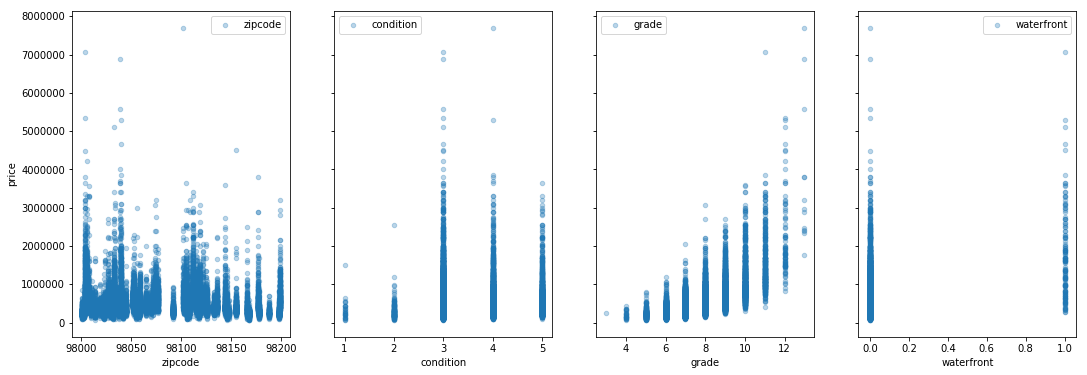

In [12]:
multi_scatter(column_names = ['zipcode', 'condition', 'grade', 'waterfront'], 
              target = 'price')

Here we see four distinct categorical variables. It is time to encode them.

In [13]:
lb_make = LabelEncoder() # call sklearns's encoder function
condition_encoded = lb_make.fit_transform(df['condition'])
grade_encoded = lb_make.fit_transform(df['grade'])
zipcode_encoded = lb_make.fit_transform(df['zipcode'])

The view column is a quantitative variable, so it can remain an integer. It seems the majority of properties have not been viewed, which makes sense because only a small number of houses are for sale at a given time. I am choosing not to drop this category because view counts may give us an indication of which locations are in-demand. A high view count in a certain area means the demand is higher than the supply, which could drive prices up.

In [15]:
df['view'].value_counts()

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

### Dealing with Outliers

While I'm in the process of doing quick calculations and cleanups, I'll take a look at the outliers in the bedroom, bathroom and sqft_lot15 columns.

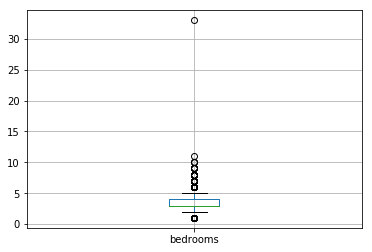

In [16]:
df.boxplot(['bedrooms'])

Only one house has 33 bedrooms, and this number is far higher than the next largest number of rooms. It seems unlikely that the number of bedrooms would jump from 11 to 33, so it is safe to assume this is a placeholder value. Getting rid of it will give cleaner summary statistics. 

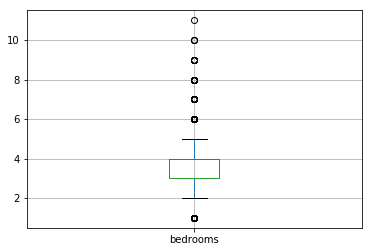

In [17]:
drop_max(column_name = 'bedrooms')

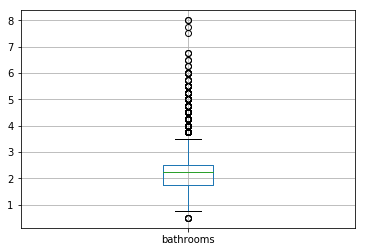

In [18]:
df.boxplot(['bathrooms']) # check for bathroom outliers

Though there are few houses with more than 4 bathrooms, none of the numbers appear obvious ouliers. Therefore, this data is acceptable. 

The summary statistics also show a housing lot that is almost 900,000 square feet. This is almost certainly an outlier (the possible the result of a mis-zoned lot), but I'd like to verify instead. While value counts are useful when you are dealing with a small set of categories, I need to use a data visualization method to look at the square footage, because there is a large range.

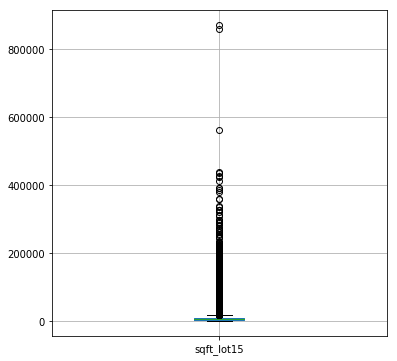

In [19]:
plt.figure(figsize = (6,6))
df.boxplot(['sqft_lot15']) 

The boxplot shows us that there are quite a few values that are land outside of the interquartile range. However, some of these values are several hundred thousand square feet larger than the others. It also seems that the interquartile range is near zero. We already know that 75% of the lots are 10,000 square feet or less, but the mean is around 12000. This means the outliers are influencing the calculations. Removing the biggest outliers will creat handier data, then we can normalize the data later.

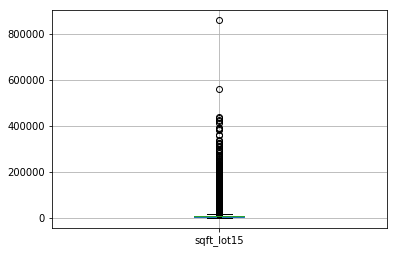

In [20]:
drop_max('sqft_lot15')

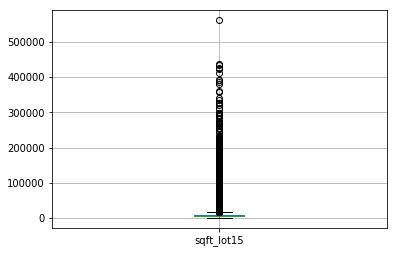

In [21]:
drop_max('sqft_lot15')

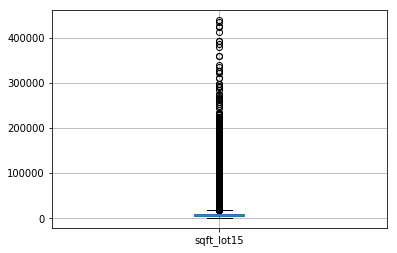

In [22]:
drop_max('sqft_lot15')

This column is far more reasonably distributed than before. #still skeewed tho. Without the large values skewing the square footage column, the calculations will be more accurate. There is still one outlier, but I am choosing to leave this in because the skew it provides will help me determine how the higher outliers will affect my final model.

Now that the "quick fix" scrubbing is complete, it's time to take a close look at the year_renovated column, which has missing values.

In [23]:
df['yr_renovated'].unique() # take a look at the values to look for anomalies

array([   0., 1991.,   nan, 2002., 2010., 1992., 2013., 1994., 1978.,
       2005., 2003., 1984., 1954., 2014., 2011., 1983., 1945., 1990.,
       1988., 1977., 1981., 1995., 2000., 1999., 1998., 1970., 1989.,
       2004., 1986., 2007., 1987., 2006., 1985., 2001., 1980., 1971.,
       1979., 1997., 1950., 1969., 1948., 2009., 2015., 1974., 2008.,
       1968., 2012., 1963., 1951., 1962., 1953., 1993., 1996., 1955.,
       1982., 1956., 1940., 1976., 1946., 1975., 1964., 1973., 1957.,
       1959., 1960., 1967., 1965., 1934., 1972., 1944., 1958.])

Here we see the yr_renovated column has a number of issues, besides being incomplete. First, there are two different ways to denote null values ('0' and 'nan'-- blank cells). Morever, the values are all floats, but there are no numbers following the years. Whereas I had assumed the date was typed as yr.month.day (e.g. 1990.05.23), this is simply a list of years. To clean this column, we need to do two things: 1) determine whether to remove or replace null values and 2) reformat the values so they are simple integers (or potentially, datetime objects). 

In [24]:
df['yr_renovated'].value_counts()

0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
2000.0       29
2005.0       29
1990.0       22
2004.0       22
2009.0       21
1989.0       20
2006.0       20
2002.0       17
1991.0       16
1998.0       16
1984.0       16
1999.0       15
2008.0       15
2010.0       15
2001.0       15
1983.0       15
2015.0       14
1985.0       14
1986.0       14
1987.0       14
1994.0       14
1992.0       13
1993.0       12
1997.0       12
1995.0       12
          ...  
1975.0        5
1964.0        5
1969.0        4
1963.0        4
1973.0        4
1981.0        4
1965.0        4
1978.0        3
1960.0        3
1958.0        3
1956.0        3
1955.0        3
1945.0        3
1972.0        3
1967.0        2
1957.0        2
1940.0        2
1974.0        2
1962.0        2
1953.0        1
1950.0        1
1934.0        1
1944.0        1
1976.0        1
1948.0        1
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Leng

In [25]:
17011/len(df['yr_renovated'])

0.787655692920313

Almost 80% of the data contains a '0'. Either the data is missing or the houses have never been renovated, At any rate, we won't gain much insight from such a small sample. It's better to drop it than to attempt to clean it and use it. 

In [26]:
df = df.drop(['yr_renovated'], axis = 1)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3.0,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,98178,47.5112,-122.257,1340,5650.0
1,6414100192,12/9/2014,538000.0,3.0,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,98125,47.7210,-122.319,1690,7639.0
2,5631500400,2/25/2015,180000.0,2.0,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,98028,47.7379,-122.233,2720,8062.0
3,2487200875,12/9/2014,604000.0,4.0,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,98136,47.5208,-122.393,1360,5000.0
4,1954400510,2/18/2015,510000.0,3.0,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,98074,47.6168,-122.045,1800,7503.0


Next, let's look at the yr_built column.

In [27]:
df.yr_built.unique() #check for obvious place holders

array([1955, 1951, 1933, 1965, 1987, 2001, 1995, 1963, 1960, 2003, 1942,
       1927, 1977, 1900, 1979, 1994, 1916, 1921, 1969, 1947, 1968, 1985,
       1941, 1915, 1909, 1948, 2005, 1929, 1981, 1930, 1904, 1996, 2000,
       1984, 2014, 1922, 1959, 1966, 1953, 1950, 2008, 1991, 1954, 1973,
       1925, 1989, 1972, 1986, 1956, 2002, 1992, 1964, 1952, 1961, 2006,
       1988, 1962, 1939, 1946, 1967, 1975, 1980, 1910, 1983, 1978, 1905,
       1971, 2010, 1945, 1924, 1990, 1914, 1926, 2004, 1923, 2007, 1976,
       1949, 1999, 1901, 1993, 1920, 1997, 1943, 1957, 1940, 1918, 1928,
       1974, 1911, 1936, 1937, 1982, 1908, 1931, 1998, 1913, 2013, 1907,
       1958, 2012, 1912, 2011, 1917, 1932, 1944, 1902, 2009, 1903, 1970,
       2015, 1934, 1938, 1919, 1906, 1935], dtype=int64)

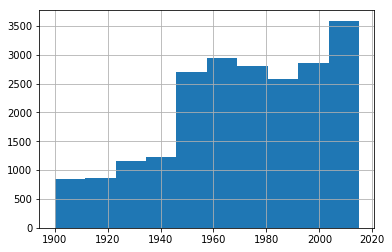

In [28]:
df.yr_built.hist() # check for categories with a seemingly large amount of values

Everything checks out with the yr_built category. The sharp rise in house construction between 1940 and 1945 is consistent with the rising population in the post-WWII era. I verified the population by looking at [the history of King County](https://www.kingcounty.gov/depts/records-licensing/archives/research-guides/KCHistoryQuickFacts.aspx). 

Finally, we need to turn the "date" column into something python recognizes and can use. 

In [29]:
pd.to_datetime(df['date'])

0       2014-10-13
1       2014-12-09
2       2015-02-25
3       2014-12-09
4       2015-02-18
5       2014-05-12
6       2014-06-27
7       2015-01-15
8       2015-04-15
9       2015-03-12
10      2015-04-03
11      2014-05-27
12      2014-05-28
13      2014-10-07
14      2015-03-12
15      2015-01-24
16      2014-07-31
17      2014-05-29
18      2014-12-05
19      2015-04-24
20      2014-05-14
21      2014-08-26
22      2014-07-03
23      2014-05-16
24      2014-11-20
25      2014-11-03
26      2014-06-26
27      2014-12-01
28      2014-06-24
29      2015-03-02
           ...    
21567   2014-06-10
21568   2014-12-02
21569   2014-08-28
21570   2014-10-15
21571   2015-03-05
21572   2014-11-13
21573   2014-09-10
21574   2014-05-14
21575   2014-10-02
21576   2015-04-16
21577   2015-03-17
21578   2014-10-17
21579   2014-10-31
21580   2014-08-13
21581   2015-04-21
21582   2014-10-13
21583   2014-09-15
21584   2014-10-15
21585   2015-04-07
21586   2014-06-26
21587   2014-08-25
21588   2015

The basement squarefootage is still an object. Let's check that out.

In [30]:
df['sqft_basement'].unique()

array(['0.0', '400.0', '910.0', '1530.0', '?', '730.0', '1700.0', '300.0',
       '970.0', '760.0', '720.0', '700.0', '820.0', '780.0', '790.0',
       '330.0', '1620.0', '360.0', '588.0', '1510.0', '410.0', '990.0',
       '600.0', '560.0', '550.0', '1000.0', '1600.0', '500.0', '1040.0',
       '880.0', '1010.0', '240.0', '265.0', '290.0', '800.0', '540.0',
       '710.0', '840.0', '380.0', '770.0', '480.0', '570.0', '1490.0',
       '620.0', '1250.0', '1270.0', '120.0', '650.0', '180.0', '1130.0',
       '450.0', '1640.0', '1460.0', '1020.0', '1030.0', '750.0', '640.0',
       '1070.0', '490.0', '1310.0', '630.0', '2000.0', '390.0', '430.0',
       '850.0', '210.0', '1430.0', '1950.0', '440.0', '220.0', '1160.0',
       '860.0', '580.0', '2060.0', '1820.0', '1180.0', '200.0', '1150.0',
       '1200.0', '680.0', '530.0', '1450.0', '1170.0', '1080.0', '960.0',
       '280.0', '870.0', '1100.0', '460.0', '1400.0', '660.0', '1220.0',
       '900.0', '420.0', '1580.0', '1380.0', '475.0', 

The column contains both zero values and question marks.

In [31]:
df['sqft_basement'].value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
800.0       201
400.0       184
1000.0      148
900.0       142
300.0       142
200.0       105
750.0       104
530.0       103
480.0       103
450.0       103
720.0        98
620.0        90
580.0        84
840.0        83
420.0        81
860.0        79
1100.0       78
670.0        78
780.0        76
550.0        76
650.0        75
240.0        74
380.0        73
680.0        73
360.0        72
          ...  
518.0         1
2610.0        1
784.0         1
266.0         1
274.0         1
2190.0        1
374.0         1
2730.0        1
2810.0        1
946.0         1
1920.0        1
2580.0        1
2720.0        1
20.0          1
652.0         1
792.0         1
1281.0        1
4820.0        1
861.0         1
2360.0        1
516.0         1
2390.0        1
3500.0        1
1275.0        1
1024.0        1
2570.0        1
1481.0        1
143.0         1
283.0         1
475.0         1
Name: sqft_basement, Len

In [32]:
df = df[df.sqft_basement != '?'] # because '0' may mean no baesment, drop '?'
df['sqft_basement'].value_counts()

0.0       12826
600.0       217
500.0       209
700.0       208
800.0       201
400.0       184
1000.0      148
300.0       142
900.0       142
200.0       105
750.0       104
480.0       103
530.0       103
450.0       103
720.0        98
620.0        90
580.0        84
840.0        83
420.0        81
860.0        79
1100.0       78
670.0        78
550.0        76
780.0        76
650.0        75
240.0        74
680.0        73
380.0        73
850.0        72
360.0        72
          ...  
518.0         1
2610.0        1
784.0         1
266.0         1
274.0         1
2190.0        1
374.0         1
2730.0        1
2810.0        1
946.0         1
1920.0        1
2580.0        1
2720.0        1
20.0          1
652.0         1
792.0         1
1281.0        1
4820.0        1
861.0         1
2360.0        1
516.0         1
2390.0        1
3500.0        1
1275.0        1
1024.0        1
2570.0        1
1481.0        1
143.0         1
283.0         1
475.0         1
Name: sqft_basement, Len

In [33]:
df['sqft_above'].unique() # just making sure the other sqft column doesn't have this problem.

array([1180, 2170,  770, 1050, 1680, 3890, 1060, 1890, 1860,  860, 1430,
       1370, 1810, 1980, 1600, 1250, 2330, 2270, 1070, 2450, 1710, 1750,
       1400,  790, 2570, 2320, 1190, 1510, 1090, 1280,  930, 2360,  890,
       2620, 2600, 1570,  920, 3160,  990, 2290, 2165, 1640, 1000, 2130,
       2830, 2250, 2420, 3250, 1850, 1590, 1260, 2519, 1540, 1110, 1770,
       2720, 2240, 3070, 2380, 2390,  880, 1040,  910, 2350, 1900, 1010,
        960, 2660, 1610,  765, 3520, 1200, 1290, 1960, 1160, 1210, 1270,
       1440, 2190, 2920, 1460, 1170, 1240, 3140, 2030, 2310,  700, 1080,
       2520, 1560, 1450, 1720, 2910, 1620, 1360, 2070, 2460, 1390, 2140,
       1320, 1340, 1550,  940, 1380, 3670, 2370, 1130,  980, 3540, 2500,
       1760, 1030, 1780, 3400, 2680, 1670, 2590,  820, 1220, 2440, 2090,
       1100, 1330, 1420, 1690, 2150, 1910, 1350, 1940,  900, 1630, 2714,
        850, 1870, 1950, 2760, 2020, 1120, 1480, 1230, 2280, 3760, 3530,
        830, 1300, 2740, 1830,  720, 2010, 3360,  8

All clear.

In [34]:
df.waterfront.isna().sum()

2339

In [35]:
((df.waterfront.isna().sum())/(len(df['waterfront'])))*100 # find the percentage of missing data

11.062763089438585

In [36]:
df.waterfront.unique()

array([nan,  0.,  1.])

The waterfront column contains boolean information: either the property is near the waterfront or it isn't. While dropping the rows with missing data would leave us with 90% of our data. For the sake of modelling, I'll drop these values. I'll separate the '0's and '1's into two different data frames and see what insight I can gain from it. 

In [37]:
df_waterfront_c= df[df['waterfront'] == df['waterfront']] # creating a new waterfront dataframe w/o null values
print(df_waterfront_c[df_waterfront_c.waterfront ==0].shape, 
      df_waterfront_c[df_waterfront_c.waterfront ==1].shape)

(18662, 20) (142, 20)


There are far fewer waterfront properties than properties that are not on the waterfront. 

In [38]:
df_waterfront_c[df_waterfront_c.waterfront ==0].describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.866200e+04,1.866200e+04,18661.000000,18662.000000,18662.000000,1.866200e+04,18662.000000,18662.0,18608.000000,18662.000000,18662.000000,18662.000000,18662.000000,18662.000000,18662.000000,18662.000000,18662.000000,18659.000000
mean,4.592109e+09,5.327914e+05,3.372810,2.112957,2074.159629,1.501725e+04,1.493516,0.0,0.203730,3.409013,7.652556,1786.485425,1971.133908,98077.490515,47.560212,-122.213485,1982.654056,12590.787341
std,2.875997e+09,3.453042e+05,0.900142,0.764426,909.276295,4.098377e+04,0.539586,0.0,0.698818,0.649370,1.166792,825.465244,29.329534,53.399790,0.138937,0.140579,681.277649,25706.981451
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.0,0.000000,1.000000,3.000000,370.000000,1900.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.124079e+09,3.200000e+05,3.000000,1.750000,1420.000000,5.040000e+03,1.000000,0.0,0.000000,3.000000,7.000000,1190.000000,1952.000000,98032.000000,47.471200,-122.328000,1490.000000,5100.000000
50%,3.905081e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.603500e+03,1.500000,0.0,0.000000,3.000000,7.000000,1560.000000,1975.000000,98065.000000,47.572400,-122.229000,1840.000000,7616.000000
75%,7.330901e+09,6.385000e+05,4.000000,2.500000,2540.000000,1.058950e+04,2.000000,0.0,0.000000,4.000000,8.000000,2210.000000,1997.000000,98117.000000,47.678300,-122.125000,2350.000000,10035.000000
max,9.900000e+09,7.700000e+06,11.000000,8.000000,13540.000000,1.651359e+06,3.500000,0.0,4.000000,5.000000,13.000000,9410.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,434728.000000


In [39]:
df_waterfront_c[df_waterfront_c.waterfront ==1].describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.420000e+02,1.420000e+02,142.000000,142.000000,142.000000,142.000000,142.000000,142.0,141.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000
mean,4.478870e+09,1.731020e+06,3.373239,2.720070,3265.415493,25716.830986,1.626761,1.0,3.780142,3.542254,8.852113,2516.436620,1962.521127,98096.197183,47.540779,-122.276063,2697.485915,22733.514085
std,2.862214e+09,1.158149e+06,1.101959,1.132797,1668.837423,45039.417864,0.550424,0.0,0.561785,0.740167,1.798136,1296.927545,26.916398,60.669228,0.112793,0.124645,812.719502,23172.405390
min,1.210290e+08,2.850000e+05,1.000000,0.750000,440.000000,1989.000000,1.000000,1.0,1.000000,1.000000,5.000000,440.000000,1905.000000,98004.000000,47.327600,-122.514000,750.000000,3230.000000
25%,2.016369e+09,8.212500e+05,3.000000,1.812500,2082.500000,11533.000000,1.000000,1.0,4.000000,3.000000,8.000000,1560.000000,1942.000000,98040.000000,47.453975,-122.376000,2140.000000,11991.500000
50%,3.692780e+09,1.590000e+06,3.000000,2.500000,2935.000000,17730.500000,2.000000,1.0,4.000000,3.000000,9.000000,2240.000000,1960.000000,98074.500000,47.548750,-122.270000,2710.000000,16260.500000
75%,7.494475e+09,2.300000e+06,4.000000,3.250000,4127.500000,26692.500000,2.000000,1.0,4.000000,4.000000,10.000000,3220.000000,1984.750000,98155.000000,47.607550,-122.209250,3200.000000,24537.500000
max,9.808701e+09,7.060000e+06,6.000000,6.750000,10040.000000,505166.000000,3.000000,1.0,4.000000,5.000000,12.000000,7680.000000,2014.000000,98199.000000,47.772900,-122.059000,4913.000000,192268.000000


**Looking at the summaries of both groupings, it's clear the average area of the houses is being skewed by large lots. We can normalize this data. Because the two sets of data behave differently, I'll create two separate columns for them to provide granularity in our analysis.** actually i need to encode

In [40]:
df = df.dropna(how = 'any')

In [41]:
df['waterfront'].astype('bool')

1        False
2        False
3        False
4        False
5        False
8        False
9        False
11       False
12       False
13       False
14       False
15       False
16       False
17       False
19       False
20       False
21       False
22       False
24       False
25       False
26       False
27       False
28       False
29       False
30       False
31       False
32       False
33       False
34       False
35       False
         ...  
21558    False
21559    False
21560     True
21561    False
21563    False
21564    False
21565    False
21566    False
21568    False
21569    False
21570    False
21571    False
21572    False
21573    False
21574    False
21575    False
21576    False
21577    False
21579    False
21580    False
21583    False
21584    False
21585    False
21588    False
21590    False
21591    False
21592    False
21593    False
21594    False
21596    False
Name: waterfront, Length: 18745, dtype: bool

In [42]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
1,6414100192,12/9/2014,538000.0,3.0,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,98125,47.7210,-122.319,1690,7639.0
2,5631500400,2/25/2015,180000.0,2.0,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,98028,47.7379,-122.233,2720,8062.0
3,2487200875,12/9/2014,604000.0,4.0,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,98136,47.5208,-122.393,1360,5000.0
4,1954400510,2/18/2015,510000.0,3.0,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,98074,47.6168,-122.045,1800,7503.0
5,7237550310,5/12/2014,1230000.0,4.0,4.50,5420,101930,1.0,0.0,0.0,3,11,3890,1530.0,2001,98053,47.6561,-122.005,4760,101930.0


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18745 entries, 1 to 21596
Data columns (total 20 columns):
id               18745 non-null int64
date             18745 non-null object
price            18745 non-null float64
bedrooms         18745 non-null float64
bathrooms        18745 non-null float64
sqft_living      18745 non-null int64
sqft_lot         18745 non-null int64
floors           18745 non-null float64
waterfront       18745 non-null float64
view             18745 non-null float64
condition        18745 non-null int64
grade            18745 non-null int64
sqft_above       18745 non-null int64
sqft_basement    18745 non-null object
yr_built         18745 non-null int64
zipcode          18745 non-null int64
lat              18745 non-null float64
long             18745 non-null float64
sqft_living15    18745 non-null int64
sqft_lot15       18745 non-null float64
dtypes: float64(9), int64(9), object(2)
memory usage: 3.0+ MB


## Exploring The Data

In [46]:
# quickly build heatmaps
def correlation_heatmap(df):   
    _, ax = plt.subplots(figsize = (15, 10))
    colormap= sns.diverging_palette(220, 10, as_cmap = True)
    sns.heatmap(df.corr(), annot=True, cmap = colormap)

need to figure out logic of below

In [67]:
def lin_reg_formula (features= None, target='price'):
    f = target + '~'
    features = '+'.join(features)
    return f+features

def build_smlinreg(features=None, target='price', df=None):
    formula = lin_reg_formula(features=features, target=target)
    linreg = smf.ols(formula, df)
    line_fit = linreg.fit()
    print("-"*50)
    print("features= {}".format(features))
    print("formula: {}".format(formula))
    print(line_fit.summary())
    print("-"*50)
    print("\n\n")
    return linreg

### How are housing prices distributed?

In [47]:
df['price'].describe()

count    1.874500e+04
mean     5.415262e+05
std      3.715921e+05
min      7.800000e+04
25%      3.215000e+05
50%      4.500000e+05
75%      6.430020e+05
max      7.700000e+06
Name: price, dtype: float64

In [48]:
df['price'].median(), df['price'].mode()

(450000.0, 0    450000.0
 dtype: float64)

The mean price is around 540,000 USD whereas the median and more are 450,000 USD. Because the mean is much higher than the median and mode, we can say the price has positive skewness. There are houses being sold for higher-than-average value. Looking at the distribution will help us better understand the physical shape of the price data.

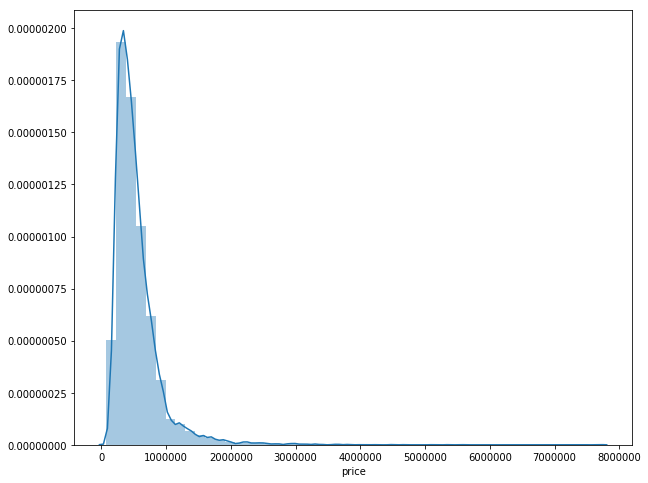

In [49]:
plt.figure(figsize = (10,8))
sns.distplot(df['price'])

Leptokurtic distributions are characterized by tall, skinny vertical columns and long tails. At a glance, the prices appear to be leptokurtic, which indicates an excess of extreme values. 

In [50]:
skew(df['price']), kurtosis(df['price'])

(4.094988777579948, 35.537361157472624)

**explain what those numbers mean**
Suggest that the prices may be skewed based on the actual data. probably square foot or date sold. can check for paring of extreme price vs value in feature of choice. log transform would normalize graph, but that doesn't make sense just yet. would like to explore first.

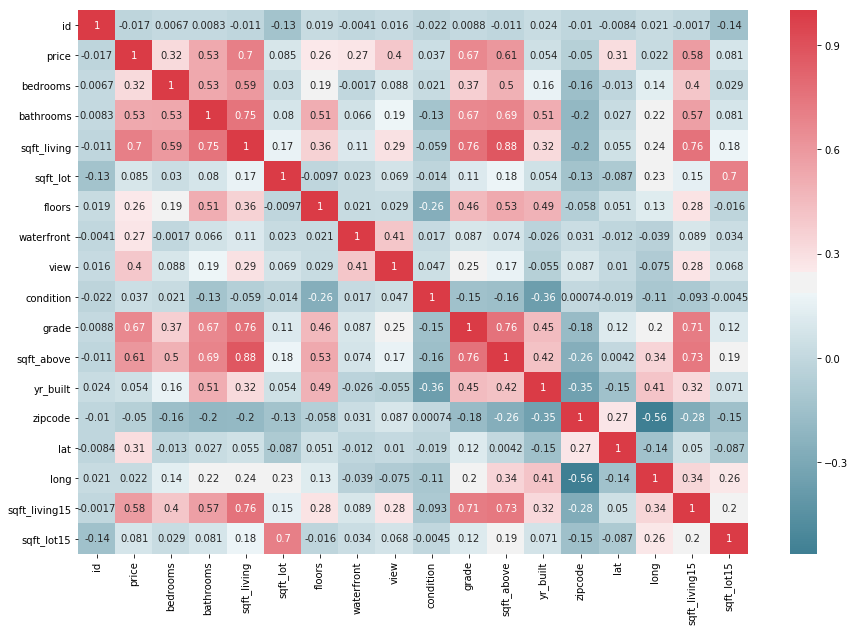

In [51]:
correlation_heatmap(df)  # determine the colinearity between two variables in the dataframe

explain heatmap

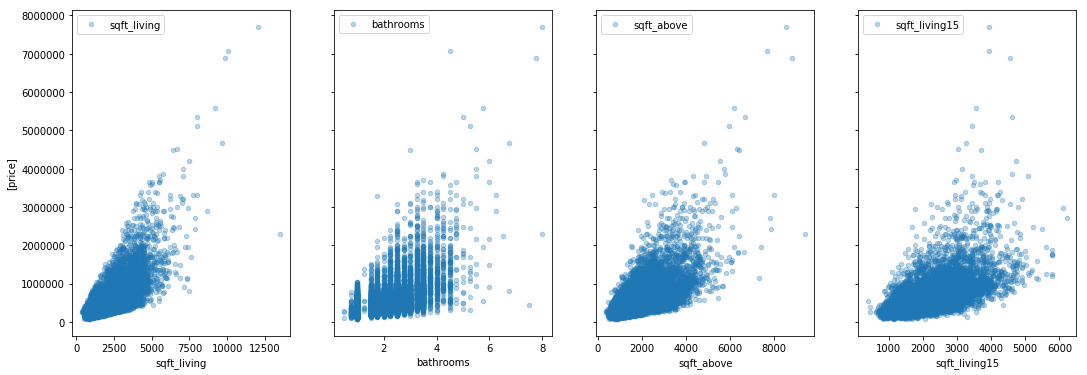

In [52]:
multi_scatter(column_names = ['sqft_living', 'bathrooms', 'sqft_above','sqft_living15'], target = ['price'])

Make this all nice and pretty later. Also, fill in the actually stuff.